In [1]:
import bmi.wrapper
import matplotlib.pyplot as plt
import logging
import numpy as np

%matplotlib inline
logger = logging.getLogger('notebook')


In [2]:
model = bmi.wrapper.BMIWrapper('../src/libcama.so')
model.set_logger(logger)
model.initialize("../../test_Elbe/CMF_Elbe/")


In [3]:
for i in range(50): # This number means total days
    model.update(86400) # 86400 means Adaptive Time Step setting; see L 29 in CMF_ELBE/generate_namfile.sh 
#    model.update(10)

In [4]:
def reshape_vars(var):
    var_shape = var.shape[::-1]
    var_reshaped = var.reshape(var_shape)
    return var_reshaped

def show_vars(model, var_name):
    var = model.get_var(var_name)
    var_reshaped = reshape_vars(var)
    print('Shape: {}'.format(var_reshaped.shape))
    plt.title(var_name)
    plt.imshow(np.ma.masked_greater(var_reshaped, 1.e19))
    plt.colorbar()

Shape: (28, 40)


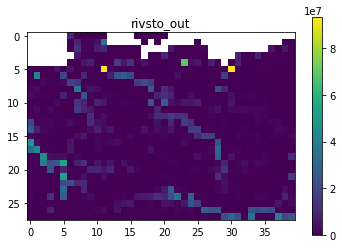

In [5]:
show_vars(model, 'rivsto_out')


Shape: (28, 40)


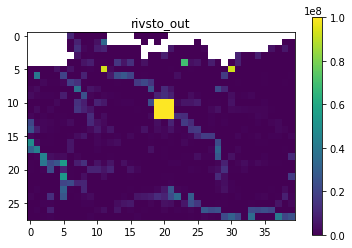

In [6]:
rivsto_out0 = reshape_vars(model.get_var('rivsto_out').copy())
rivsto_out = reshape_vars(model.get_var('rivsto_out'))

# add some extra water in the rivers
rivsto_out[10:13, 19:22] = 1e8
model.set_var('rivsto_out', rivsto_out.reshape(model.get_var_shape('rivsto_out')))
show_vars(model, 'rivsto_out')


Shape: (28, 40)


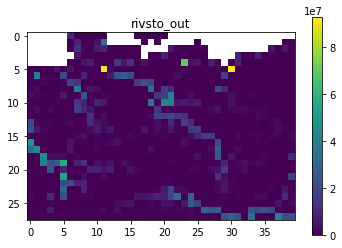

In [7]:
# run
for i in range(1):
    model.update(100)
#     model.update(86400) 
show_vars(model, 'rivsto_out')

In [8]:
rivsto_out1 = reshape_vars(model.get_var('rivsto_out').copy())

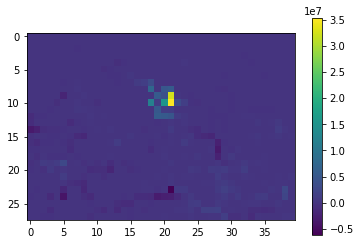

In [9]:
rivsto_dif = rivsto_out1 - rivsto_out0
plt.imshow(rivsto_dif)
plt.colorbar()

In [10]:
rivsto_dif[8:15, 17:24]

array([[ -1.16930200e+03,   7.68368800e+06,  -1.70408164e+04,
          5.08638400e+06,   5.69983750e+06,  -5.54009375e+03,
         -2.23938594e+04],
       [ -6.63100342e+02,  -1.49784473e+03,   5.64786700e+06,
          4.09236200e+06,   3.24898080e+07,   3.63219344e+05,
         -2.72025537e+03],
       [ -2.60701355e+02,   1.18056780e+07,   1.13150412e+06,
          1.52350960e+07,   3.53361960e+07,   3.23693350e+06,
          1.50459250e+06],
       [ -2.88309814e+02,  -3.79125977e+03,   5.19375200e+06,
          1.26657388e+06,   1.28613375e+06,  -1.05915503e+03,
         -2.26227148e+03],
       [ -1.07964375e+04,   5.98207500e+04,   5.83077800e+06,
          5.49943100e+06,   4.93503900e+06,   1.07471100e+06,
          5.49288000e+05],
       [ -1.70960535e+03,  -6.78476855e+03,  -5.43212500e+04,
         -4.34539648e+03,   3.18498000e+05,  -3.00273750e+04,
          3.62622000e+05],
       [ -2.65618000e+05,  -5.99263770e+03,  -5.14627500e+04,
         -4.92631250e+04,   8.07